In [0]:
pip install uproot

     |████████████████████████████████| 122kB 2.8MB/s 
     |████████████████████████████████| 92kB 11.1MB/s 


In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive/test_run

/content/gdrive/My Drive/test_run


Import relevant libraries & use uproot to open it.

In [0]:
import uproot
import pandas
import numpy as np

tree = uproot.open("lsvDS20kLarAttempt_v1.root")["dstree"]

The different variables contained within the tree.

In [0]:
tree.show()

ev                         (no streamer)              asdtype('>i4')
pdg                        (no streamer)              asdtype('>i4')
ene0                       (no streamer)              asdtype('>f4')
s1ene                      (no streamer)              asdtype('>f4')
s2ene                      (no streamer)              asdtype('>f4')
veto_visene                (no streamer)              asdtype('>f4')
mu_visene                  (no streamer)              asdtype('>f4')
tpcene                     (no streamer)              asdtype('>f4')
vetoene                    (no streamer)              asdtype('>f4')
muene                      (no streamer)              asdtype('>f4')
ene                        (no streamer)              asdtype('>f4')
x                          (no streamer)              asdtype('>f4')
y                          (no streamer)              asdtype('>f4')
z                          (no streamer)              asdtype('>f4')
r                          (no str

Training Dataset is the x variable.

In [0]:
pip install physt

     |████████████████████████████████| 92kB 5.0MB/s 
  Created wheel for physt: filename=physt-0.4.7-cp36-none-any.whl size=96161 sha256=5e54d2d4c530deed1c533d902124ee00397dbcf7fd6cccf49a9163ef21e88b4b
  Stored in directory: /root/.cache/pip/wheels/65/b9/8d/b7ee4c4458c5e906e8edef8a2dc9fa3efcb13ab37365db289d
Successfully built physt


'\nfig = plt.figure()\nax = fig.add_subplot(111)\nax.scatter(x,y)\nplt.show()\n'

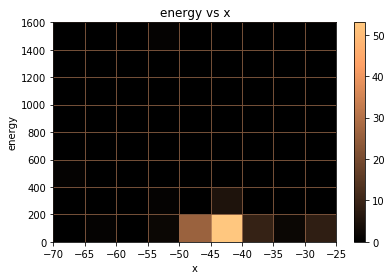

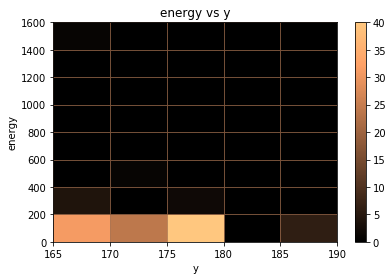

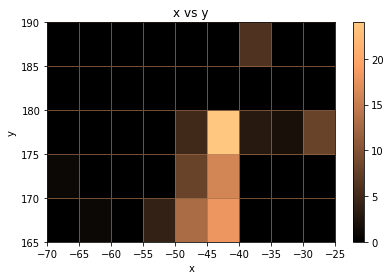

In [0]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from physt import h1, h2, histogramdd
import matplotlib.cm as cm

x = tree.array("dep_x")
y = tree.array("dep_y")
en = tree.array("dep_ene")

i=5
#for i in range(0,len(x)):
histogram = h2(x[i], en[i], "fixed_width", (5, 200),name="energy vs x", axis_names=["x", "energy"])
histogram2 = h2(y[i], en[i], "fixed_width", (5, 200), name="energy vs y", axis_names=["y", "energy"])
histogram3 = h2(x[i], y[i], "fixed_width", (5, 5), name="x vs y", axis_names=["x", "y"])


fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

ax = histogram.plot(ax=ax, cmap=cm.copper,grid_color=cm.copper(0.5))
ax2 = histogram2.plot(ax=ax2, cmap=cm.copper, grid_color=cm.copper(0.5))
ax3 = histogram3.plot(ax=ax3, cmap=cm.copper, grid_color=cm.copper(0.5))

'''
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)
plt.show()
'''

              ene0        s1ene       s2ene  ...  npeS2    meanDepX    meanDepY
entry                                        ...                               
0      1891.241089     0.000000    0.000000  ...      0 -216.743378  -62.341805
1      1885.814697     0.000000    0.000000  ...      0   21.699533  294.387177
2      3712.961914     0.000000    0.000000  ...      0   10.648973 -148.296051
3       853.563721     0.000000    0.000000  ...      0  108.161301  -39.190319
4      2308.986328     0.000000    0.000000  ...      0  230.901810  136.964401
...            ...          ...         ...  ...    ...         ...         ...
495    1438.984009  1619.455444  502.573517  ...      0 -101.604622  131.858994
496    3435.802734     0.000000    0.000000  ...      0 -246.394623 -112.075882
497    1347.080688     0.000000    0.000000  ...      0 -215.537018  108.161476
498    1770.759644     0.000000    0.000000  ...      0  192.139557  -71.051971
499    2345.711426     0.000000    0.000

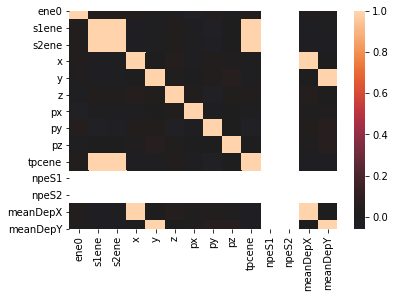

In [0]:
import seaborn as sns

pandasDS=tree.pandas.df(["ene0","s1ene","s2ene","x","y","z","px","py","pz","tpcene","npeS1","npeS2"],flatten=False)

x = tree.array("dep_x")
y = tree.array("dep_y")

meanDepX=[]
meanDepY=[]

for i in range(0,len(x)):
  meanDepX.append(np.mean(x[i]))
  meanDepY.append(np.mean(y[i]))

pandasDS["meanDepX"]=meanDepX
pandasDS["meanDepY"]=meanDepY

print(pandasDS)
corr = pandasDS.corr()
sns.heatmap(corr, 
            center=0,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [0]:
train_DS = tree.array("s2ene") / 8000

(array([35.11008138,  0.74861581,  0.67375418,  0.07486159,  0.37430793,
         0.29944626,  0.        ,  0.07486157,  0.        ,  0.07486157]),
 array([0.        , 0.02671597, 0.05343195, 0.08014792, 0.10686389,
        0.13357987, 0.16029584, 0.18701181, 0.21372779, 0.24044375,
        0.26715973], dtype=float32),
 <a list of 10 Patch objects>)

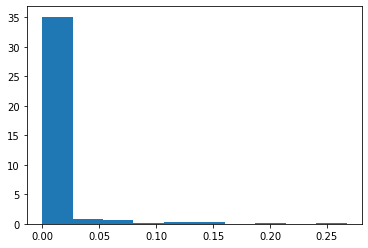

In [0]:
plt.hist(train_DS, density = True)

In [0]:
len(train_DS)

500

In [0]:
num_train = int(1e4)
noise_size = 500

In [0]:
#  Model dependent constants
#  Define model PDF

#The range of the model
range_min, range_max = 0, 1
#The range being plot
range_width = range_max - range_min

plot_resolution = 200

#Initial weights
w1, m1, s1 = 0.5, 8., 1.
w2, m2, s2 = 0.5, 14, 5.

In [0]:
#  Create GAN

from tensorflow.keras.layers     import BatchNormalization, Dense, Dropout, Input, LeakyReLU
from tensorflow.keras.models     import Model, Sequential
from tensorflow.keras.optimizers import Adam

#Discriminator
#See how number of neurons are sae for each layer to reduce number of hyperparameters
d = Sequential(name="Discriminator")
d.add(Dense(25, activation="relu", input_shape=(1,)))
#d.add(Dense(50, activation="relu"))
#d.add(Dense(50))
#d.add(Dense(50, activation="relu"))
#d.add(Dense(50))
d.add(LeakyReLU(0.2))
d.add(Dense(2, activation="softmax"))
d.compile(loss="categorical_crossentropy", optimizer=Adam(0.0002, beta_1=0.9), metrics=["accuracy"])
d.summary()

g = Sequential(name="Generator")
g.add(Dense(25, activation="relu", input_shape=(noise_size,)))
g.add(BatchNormalization())
g.add(Dense(25, activation="relu"))
g.add(BatchNormalization())
#g.add(Dense(50, activation="relu"))
#g.add(BatchNormalization())
#g.add(Dense(50, activation="relu"))
#g.add(BatchNormalization())
g.add(Dense(1, activation="linear"))
g.summary()

input_layer = Input((noise_size,))
output_layer = d(g(input_layer))
gan = Model(input_layer, output_layer)
d.trainable = False
gan.compile(loss="categorical_crossentropy", optimizer=Adam(0.0002, beta_1=0.5), metrics=["accuracy"])
gan.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                50        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 52        
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25)                12525     
_________________________________________________________________
batch_normalization (

In [0]:
#  Func: plot GAN progress
def plot_points_GAN (data, label, epoch, batch_size, d_acc, gan_acc) :
    
    #y = plt.hist(train_DS , alpha = 0.3,density = True, label = 'Real Data')
    #x = np.linspace(range_min, range_max, 200)
    h = plt.hist(data, bins=np.linspace(range_min, range_max, 1+int(range_width/plot_resolution)), color="blue", alpha=0.6,density = True, label=label)
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("x", size=14, labelpad=10)
    #y_max = 1.5*max([max(y),max(h[0])])
    y_max = 8
    plt.ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
    plt.gca().set_xlim([range_min-0.1*range_width, range_max+0.1*range_width])
    '''plt.text(range_min+0.*1.1*range_width   , 0.84*y_max, "GAN test", size=18, style="italic", weight="bold")
    plt.text(range_min+0.750*1.1*range_width, 0.68*y_max, f"Epoch: {epoch}")
    plt.text(range_min+0.683*1.1*range_width, 0.61*y_max, f"Batch size: {batch_size}")
    plt.text(range_min+0.780*1.1*range_width, 0.54*y_max, r"$\epsilon_{\rm disc}$: "+f"{int(100.*d_acc)}%")
    plt.text(range_min+0.780*(range_max-range_min), 0.47*y_max, r"$\epsilon_{\rm GAN}$: "+f"{int(100.*gan_acc)}%")
    '''
    plt.subplots_adjust(left=0.18, right=0.98, top=0.95, bottom=0.15)
    plt.savefig("Train_epoch{epoch}.png", dpi=96)
    plt.show()

In [0]:
#  Train GAN

epochs     = 5000
batch_size = 100
max_D_itrs_per_G_itr_e70 = 4
max_D_itrs_per_G_itr_e52 = 3

train_median, train_std = np.median(train_DS), np.std(train_DS)
quantiles = np.array([.25, .75])
train_quantiles = np.quantile(train_DS, quantiles) - train_median

def update_batch_size (gen_DS) :
    global batch_size
    gen_median, gen_std = np.median(gen_DS.flatten()), np.std(gen_DS.flatten())
    if np.fabs((gen_median-train_median)/train_std) > 1./np.sqrt(batch_size) : return
    if np.fabs((gen_std/train_std)-1) > 1./np.sqrt(batch_size) : return
    '''if batch_size > 200 :
        gen_quantiles = np.quantile(gen_DS, quantiles) - gen_median
        for gen_q, train_q in zip(gen_quantiles, train_quantiles) :
            if np.fabs((gen_q/train_q)-1) > 1./np.sqrt(batch_size) : return'''
    batch_size = min(100+batch_size, num_train)
    
    epochs_saved = []



[0.7140259552001953, 0.51]


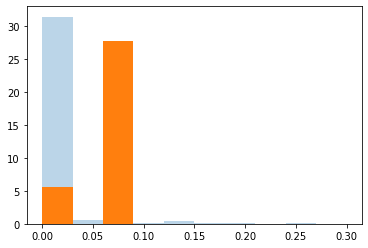

[0.6744443273544312, 0.85]


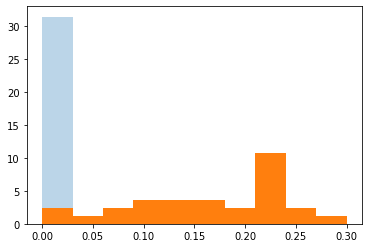

[0.6695655822753906, 0.895]


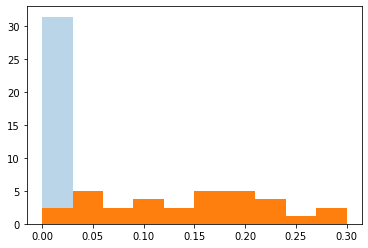

[0.6483516454696655, 0.9]


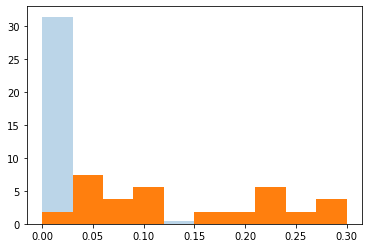

[0.6433963108062745, 0.82]


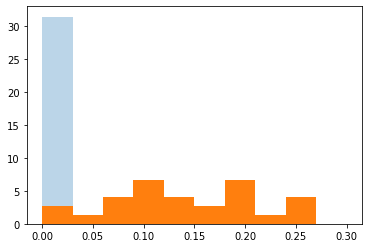

[0.6288352632522582, 0.825]


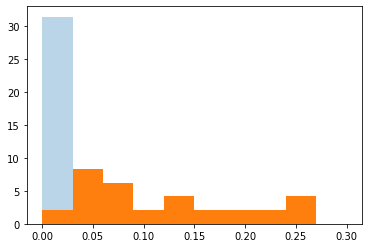

[0.6288620352745056, 0.795]


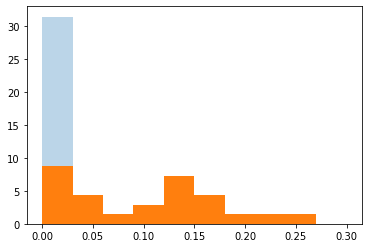

[0.6565489864349365, 0.7]


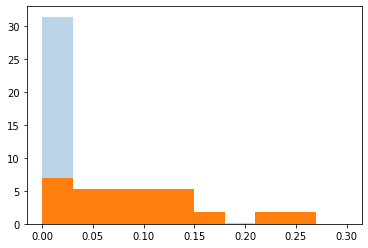

[0.6527884268760681, 0.795]


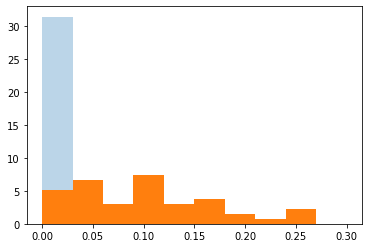

[0.6567449307441712, 0.77]


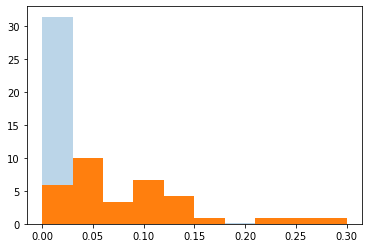

[0.6474873781204223, 0.845]


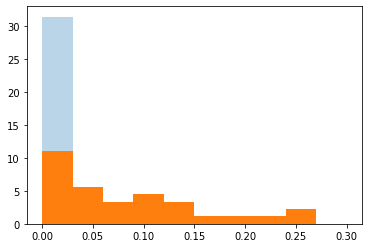

[0.6650437450408936, 0.765]


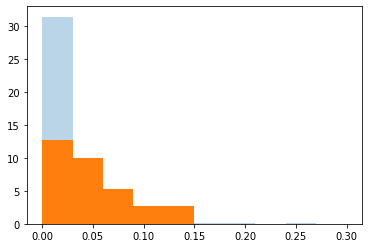

[0.6604586887359619, 0.825]


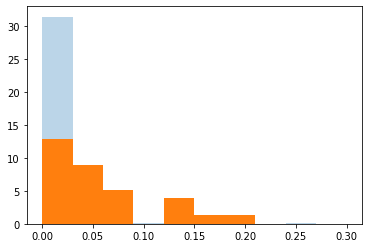

[0.6715030431747436, 0.745]


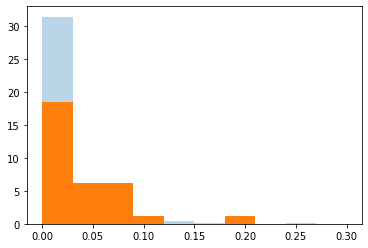

[0.673197889328003, 0.785]


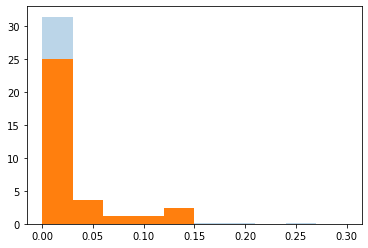

[0.6835070490837097, 0.68]


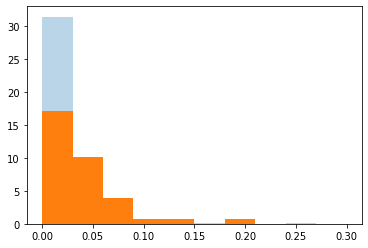

[0.682514910697937, 0.72]


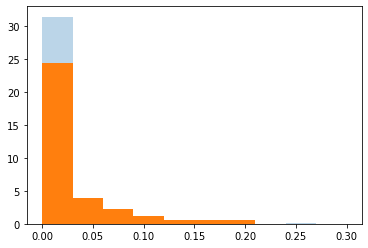

[0.6808763027191163, 0.735]


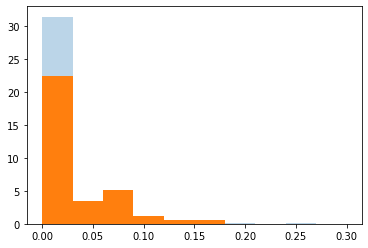

[0.6845786595344543, 0.71]


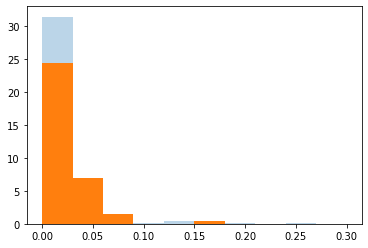

[0.6836274838447571, 0.76]


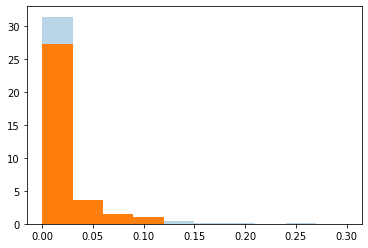

[0.6857885336875915, 0.705]


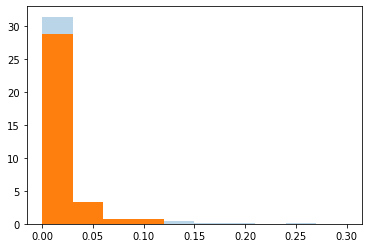

[0.6836166572570801, 0.76]


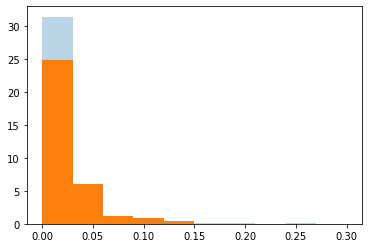

[0.6889641332626343, 0.7]


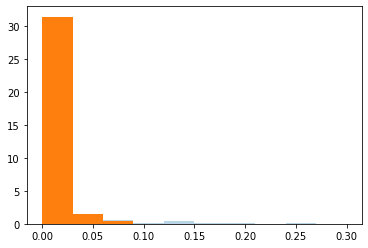

[0.6840743899345398, 0.845]


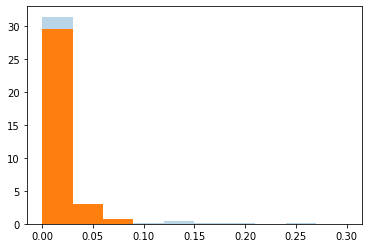

[0.6908131599426269, 0.725]


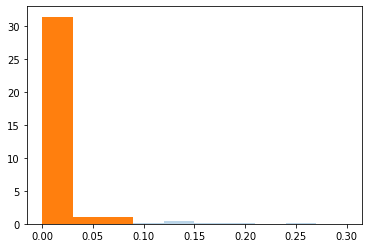

[0.6891819858551025, 0.72]


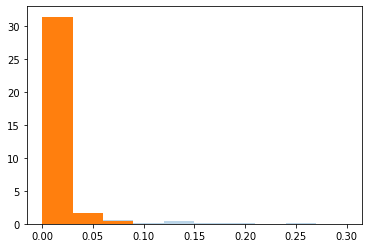

[0.6897181749343873, 0.695]


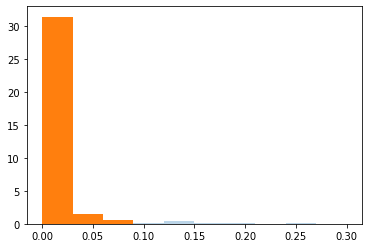

[0.6903136372566223, 0.815]


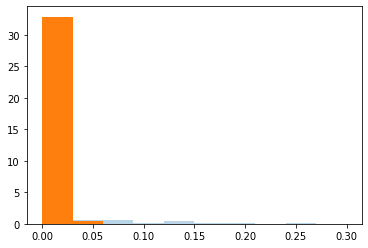

[0.6881758737564087, 0.75]


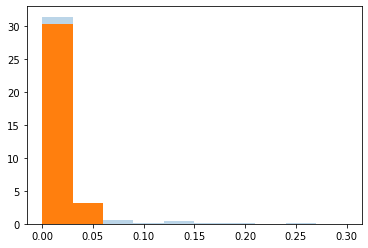

[0.6870913219451904, 0.82]


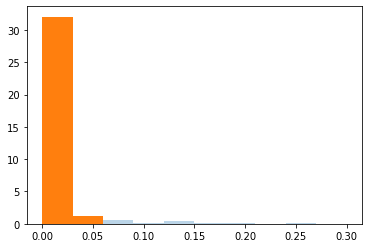

[0.6912017703056336, 0.64]


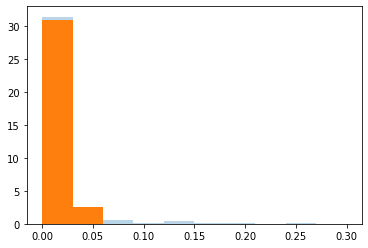

[0.6913667964935303, 0.63]


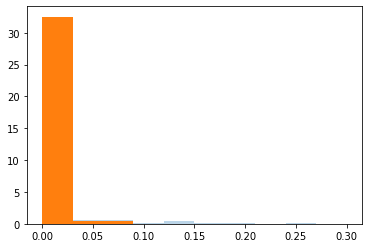

[0.6921813893318176, 0.64]


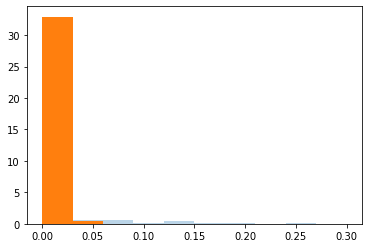

[0.6893251752853393, 0.8]


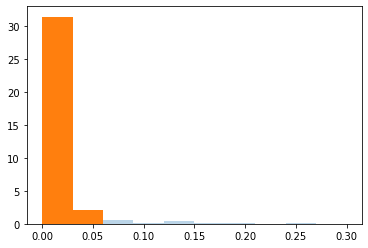

[0.692943410873413, 0.725]


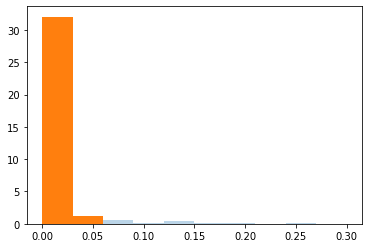

[0.6825259232521057, 0.815]


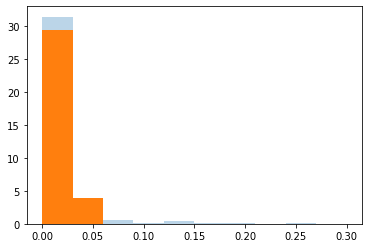

[0.6906040191650391, 0.75]


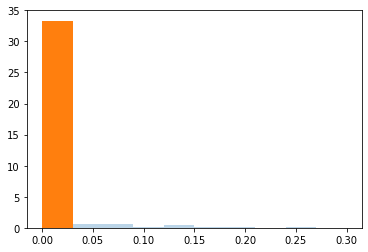

[0.6888349580764771, 0.71]


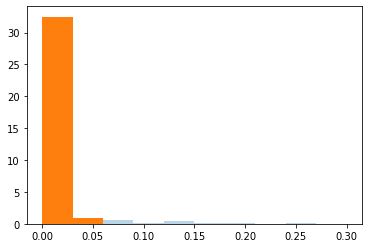

[0.6930853796005249, 0.795]


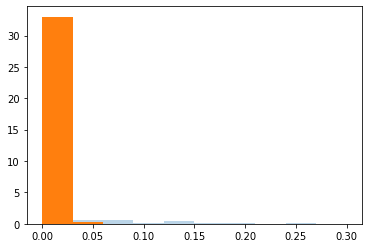

[0.6889775133132935, 0.81]


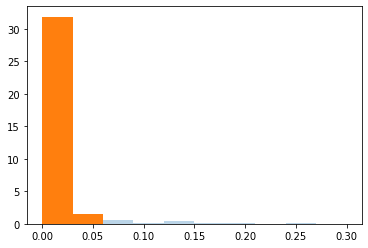

[0.689614691734314, 0.73]


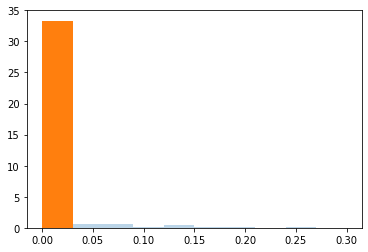

[0.6924854373931885, 0.715]


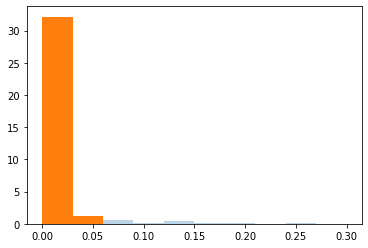

[0.6937745761871338, 0.585]


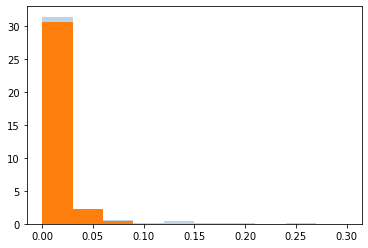

[0.6927044868469239, 0.79]


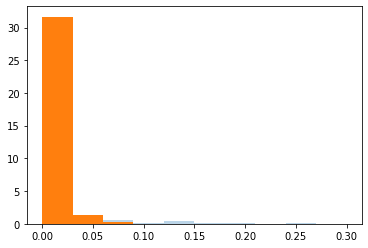

[0.6929709672927856, 0.755]


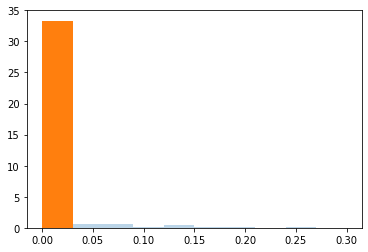

[0.6914937734603882, 0.695]


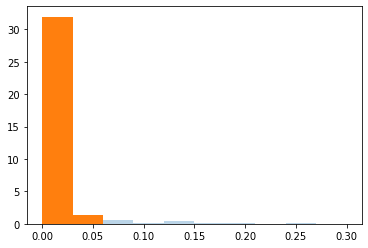

[0.6936924505233765, 0.585]


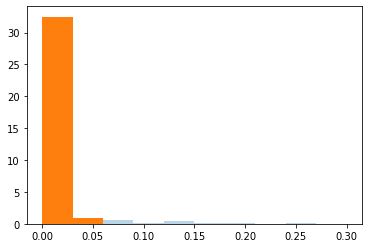

[0.6926218891143798, 0.795]


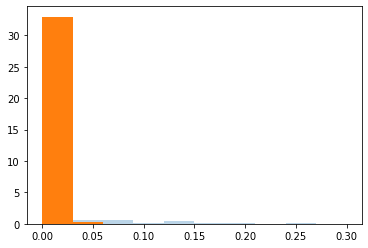

[0.6923995733261108, 0.675]


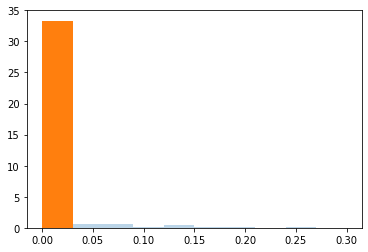

[0.6920545625686646, 0.755]


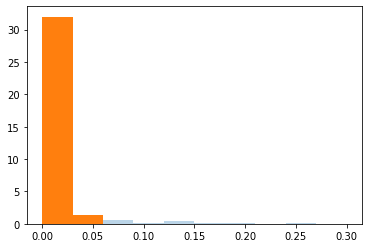

[0.6913580513000488, 0.635]


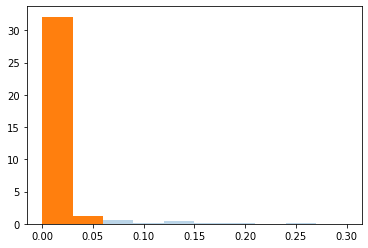

In [0]:
epochs_saved = []
loss = []
epoch_no = []
for e in range(epochs) :
    noise  = np.random.uniform(low = 0, high = 1, size=(batch_size, noise_size))
    
    #Get the real and fake data
    batch_DS = train_DS[np.random.randint(0, len(train_DS), batch_size)].reshape(batch_size, 1)
    #fake data made from predicting noise
    #print(batch_DS)
    gen_DS   = g.predict(noise)
    
    #Real data has label [1.,0]
    real_label = np.array([[1., 0.] for i in range(batch_size)])
    
    #Fake data has label [0.,1.]
    fake_label = np.array([[0., 1.] for i in range(batch_size)])
    
    #Combine real and generated data
    X = np.concatenate([batch_DS  , gen_DS    ])
    Y = np.concatenate([real_label, fake_label])
    
    
    d.trainable = True
    d_loss, d_acc = d.train_on_batch(X, Y)
    num_itr = 0
    while num_itr < max_D_itrs_per_G_itr_e70 and d_acc < 0.7 :
        d_loss, d_acc = d.train_on_batch(X, Y)
        num_itr = num_itr + 1
    while num_itr < max_D_itrs_per_G_itr_e52 and d_acc < 0.52 :
        d_loss, d_acc = d.train_on_batch(X, Y)
        num_itr = num_itr + 1
        
    noise  = np.random.uniform(low = 0, high = 1, size=(batch_size, noise_size))
    d.trainable = False
    gan.train_on_batch(noise, real_label)
    
    if e == 0 or (e+1) % 100 == 0 :
        noise  = np.random.uniform(low = 0, high = 1, size=(batch_size, noise_size))
        gen_DS = g.predict(noise)
        print(d.evaluate(X, Y, verbose=0))
        epoch_no.append(e)
        plt.hist(train_DS, alpha = 0.3,density = True, range = (0,0.3), bins = 10, label = 'Real Data')
        plt.hist(gen_DS, density = True, range = (0,0.3), bins = 10, label = 'Gen Data')
        plt.show()
        loss.append(d.evaluate(X, Y, verbose=0)[1])
        epochs_saved.append(e+1)


Plotting Discriminator Accuracy

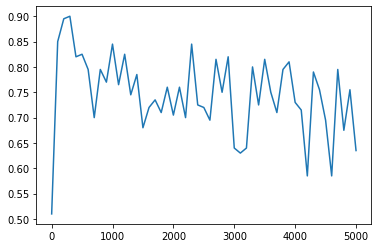

In [0]:
plt.plot(epoch_no,loss)

[0.6913580513000488, 0.635]


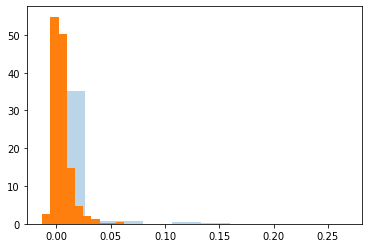

In [0]:
batch_size=500
noise  = np.random.uniform(low = 0, high = 1, size=(batch_size, noise_size))
gen_DS = g.predict(noise)
print(d.evaluate(X, Y, verbose=0))
epoch_no.append(e)
plt.hist(train_DS, alpha = 0.3,density = True, label = 'Real Data')
plt.hist(gen_DS, density = True, label = 'Gen Data')
plt.show()